In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from torchinfo import summary
from torchviz import make_dot
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

In [2]:
torch.manual_seed(123)
inputs = torch.randn(1, 10)
print(inputs)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])


In [4]:
dropout = nn.Dropout(0.5)
dropout.train()
print(dropout.training)

outputs = dropout(inputs)
print(outputs)

dropout.eval()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

True
tensor([[-0.0000,  0.2407, -0.0000, -0.4808, -0.0000,  0.0000, -1.9447, -0.0000,
          0.6478, -0.2170]])
False
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])


In [5]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False),
])

In [7]:
from pythonlibs.torch_lib1 import *

In [8]:
print(README)

Common Library for PyTorch
Author: M. Akaishi


In [9]:
class CNN_v2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, 10)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [10]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

In [12]:
# データ取得用関数 Dataset

data_root = '../..//data'

train_set = datasets.CIFAR10(
    root = data_root, train = True, 
    download = True, transform = transform)

# 検証データの取得
test_set = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
# ミニバッチのサイズ指定
batch_size = 100

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(train_set, 
    batch_size = batch_size, shuffle = True)

# 検証用データローダー
# 検証時にシャッフルは不要
test_loader = DataLoader(test_set,  
    batch_size = batch_size, shuffle = False) 

In [15]:
# GPUチェック

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [16]:
# 分類先クラスの名称リスト
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 分類先クラス数　今回は10になる
n_output = len(list(set(classes)))

# 結果確認
print(n_output)

10


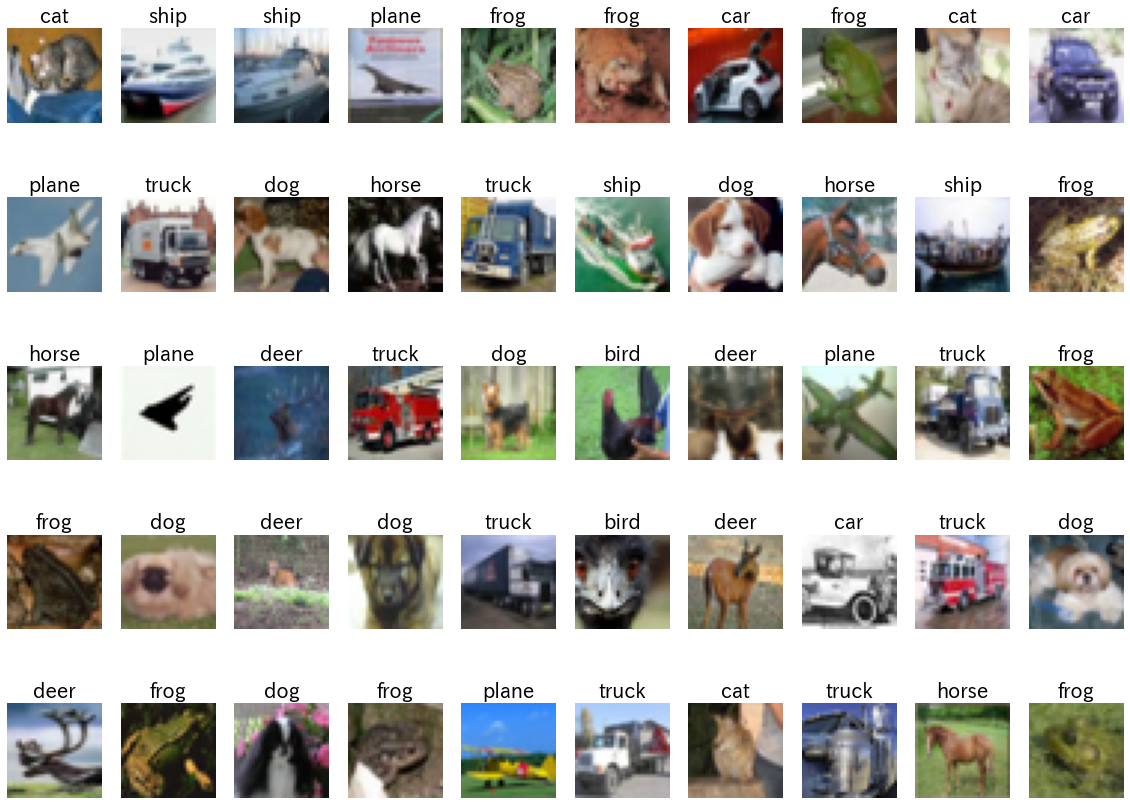

In [17]:
# 最初の50個の表示
show_images_labels(test_loader, classes, None, None)

In [33]:
torch_seed()

lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history = np.zeros((0, 5))

In [34]:
num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)


Epoch [1/50], loss: 0.02303 acc: 0.10000 val_loss: 0.02303, val_acc: 0.10000



Epoch [2/50], loss: 0.02303 acc: 0.10000 val_loss: 0.02303, val_acc: 0.10000



Epoch [3/50], loss: 0.02302 acc: 0.10148 val_loss: 0.02302, val_acc: 0.10000



Epoch [4/50], loss: 0.02302 acc: 0.10144 val_loss: 0.02302, val_acc: 0.10160



Epoch [5/50], loss: 0.02302 acc: 0.12456 val_loss: 0.02302, val_acc: 0.15760



Epoch [6/50], loss: 0.02301 acc: 0.16066 val_loss: 0.02301, val_acc: 0.19580



Epoch [7/50], loss: 0.02299 acc: 0.19718 val_loss: 0.02295, val_acc: 0.21790



Epoch [8/50], loss: 0.02262 acc: 0.21006 val_loss: 0.02138, val_acc: 0.22130



Epoch [9/50], loss: 0.02033 acc: 0.25908 val_loss: 0.01952, val_acc: 0.29970



Epoch [10/50], loss: 0.01919 acc: 0.30610 val_loss: 0.01855, val_acc: 0.33650



Epoch [11/50], loss: 0.01805 acc: 0.35036 val_loss: 0.01721, val_acc: 0.38100



Epoch [12/50], loss: 0.01710 acc: 0.37942 val_loss: 0.01626, val_acc: 0.40590



Epoch [13/50], loss: 0.01637 acc: 0.40204 val_loss: 0.01572, val_acc: 0.42440



Epoch [14/50], loss: 0.01577 acc: 0.42312 val_loss: 0.01514, val_acc: 0.44450



Epoch [15/50], loss: 0.01532 acc: 0.43930 val_loss: 0.01539, val_acc: 0.43740



Epoch [16/50], loss: 0.01493 acc: 0.45336 val_loss: 0.01596, val_acc: 0.42460



Epoch [17/50], loss: 0.01451 acc: 0.47162 val_loss: 0.01429, val_acc: 0.48170



Epoch [18/50], loss: 0.01407 acc: 0.49022 val_loss: 0.01400, val_acc: 0.49810



Epoch [19/50], loss: 0.01362 acc: 0.50682 val_loss: 0.01318, val_acc: 0.52230



Epoch [20/50], loss: 0.01316 acc: 0.52900 val_loss: 0.01285, val_acc: 0.53320



Epoch [21/50], loss: 0.01268 acc: 0.54712 val_loss: 0.01257, val_acc: 0.54800



Epoch [22/50], loss: 0.01228 acc: 0.56272 val_loss: 0.01299, val_acc: 0.53500



Epoch [23/50], loss: 0.01187 acc: 0.57914 val_loss: 0.01199, val_acc: 0.57840



Epoch [24/50], loss: 0.01146 acc: 0.59590 val_loss: 0.01126, val_acc: 0.59880



Epoch [25/50], loss: 0.01100 acc: 0.61138 val_loss: 0.01131, val_acc: 0.60030



Epoch [26/50], loss: 0.01063 acc: 0.62746 val_loss: 0.01088, val_acc: 0.61530



Epoch [27/50], loss: 0.01027 acc: 0.63758 val_loss: 0.01168, val_acc: 0.58690



Epoch [28/50], loss: 0.00993 acc: 0.65188 val_loss: 0.01043, val_acc: 0.63730



Epoch [29/50], loss: 0.00957 acc: 0.66466 val_loss: 0.01033, val_acc: 0.63610



Epoch [30/50], loss: 0.00920 acc: 0.67938 val_loss: 0.01017, val_acc: 0.64810



Epoch [31/50], loss: 0.00891 acc: 0.69058 val_loss: 0.00969, val_acc: 0.65870



Epoch [32/50], loss: 0.00857 acc: 0.70060 val_loss: 0.00980, val_acc: 0.66080



Epoch [33/50], loss: 0.00829 acc: 0.70960 val_loss: 0.00944, val_acc: 0.67110



Epoch [34/50], loss: 0.00795 acc: 0.72146 val_loss: 0.00966, val_acc: 0.67200



Epoch [35/50], loss: 0.00765 acc: 0.73466 val_loss: 0.00968, val_acc: 0.66430



Epoch [36/50], loss: 0.00738 acc: 0.74140 val_loss: 0.00919, val_acc: 0.68580



Epoch [37/50], loss: 0.00708 acc: 0.75256 val_loss: 0.00933, val_acc: 0.68110



Epoch [38/50], loss: 0.00675 acc: 0.76522 val_loss: 0.00962, val_acc: 0.67480



Epoch [39/50], loss: 0.00645 acc: 0.77398 val_loss: 0.00901, val_acc: 0.69590



Epoch [40/50], loss: 0.00615 acc: 0.78406 val_loss: 0.00965, val_acc: 0.67900



Epoch [41/50], loss: 0.00585 acc: 0.79496 val_loss: 0.00917, val_acc: 0.69710



Epoch [42/50], loss: 0.00557 acc: 0.80468 val_loss: 0.00984, val_acc: 0.68500



Epoch [43/50], loss: 0.00525 acc: 0.81570 val_loss: 0.00934, val_acc: 0.69980



Epoch [44/50], loss: 0.00496 acc: 0.82720 val_loss: 0.01007, val_acc: 0.68730



Epoch [45/50], loss: 0.00466 acc: 0.83792 val_loss: 0.01038, val_acc: 0.68020



Epoch [46/50], loss: 0.00430 acc: 0.84928 val_loss: 0.01049, val_acc: 0.68930



Epoch [47/50], loss: 0.00406 acc: 0.85758 val_loss: 0.01048, val_acc: 0.69510



Epoch [48/50], loss: 0.00373 acc: 0.86836 val_loss: 0.01056, val_acc: 0.69440



Epoch [49/50], loss: 0.00344 acc: 0.87824 val_loss: 0.01201, val_acc: 0.67690



Epoch [50/50], loss: 0.00314 acc: 0.89058 val_loss: 0.01171, val_acc: 0.69180


初期状態: 損失: 0.02303 精度: 0.10000
最終状態: 損失: 0.01171 精度: 0.69180


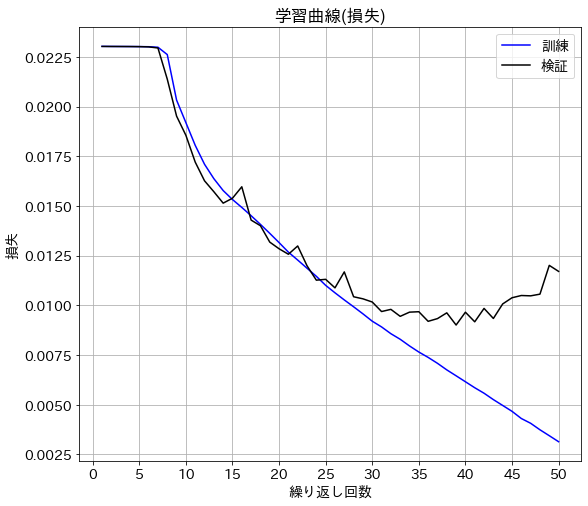

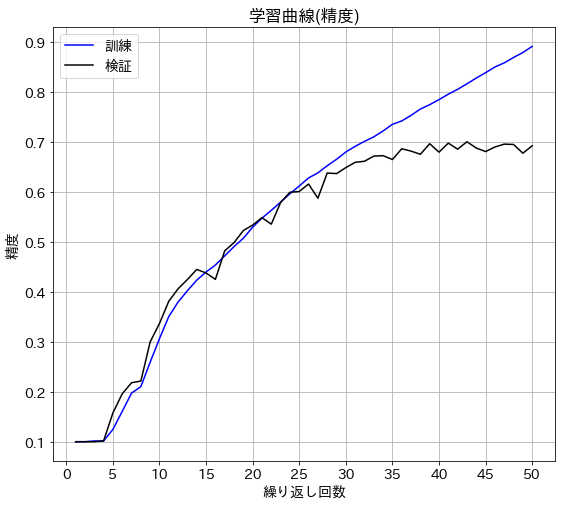

In [38]:
evaluate_history(history)

In [27]:
torch_seed()

lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
history2 = np.zeros((0, 5))

In [28]:
num_epochs = 20
history2 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history2)


Epoch [1/20], loss: 0.02284 acc: 0.12310 val_loss: 0.02042, val_acc: 0.26270



Epoch [2/20], loss: 0.01812 acc: 0.32924 val_loss: 0.01542, val_acc: 0.42630



Epoch [3/20], loss: 0.01434 acc: 0.47300 val_loss: 0.01298, val_acc: 0.52420



Epoch [4/20], loss: 0.01188 acc: 0.57328 val_loss: 0.01095, val_acc: 0.59490



Epoch [5/20], loss: 0.00979 acc: 0.65500 val_loss: 0.00946, val_acc: 0.66930



Epoch [6/20], loss: 0.00827 acc: 0.70784 val_loss: 0.00814, val_acc: 0.71500



Epoch [7/20], loss: 0.00687 acc: 0.75846 val_loss: 0.00805, val_acc: 0.72300



Epoch [8/20], loss: 0.00585 acc: 0.79500 val_loss: 0.00732, val_acc: 0.75070



Epoch [9/20], loss: 0.00494 acc: 0.82744 val_loss: 0.00702, val_acc: 0.76140



Epoch [10/20], loss: 0.00422 acc: 0.85082 val_loss: 0.00731, val_acc: 0.76250



Epoch [11/20], loss: 0.00352 acc: 0.87608 val_loss: 0.00760, val_acc: 0.75920



Epoch [12/20], loss: 0.00285 acc: 0.89894 val_loss: 0.00853, val_acc: 0.75550



Epoch [13/20], loss: 0.00236 acc: 0.91722 val_loss: 0.00901, val_acc: 0.76390



Epoch [14/20], loss: 0.00201 acc: 0.93012 val_loss: 0.00925, val_acc: 0.74910



Epoch [15/20], loss: 0.00169 acc: 0.93924 val_loss: 0.00996, val_acc: 0.75900



Epoch [16/20], loss: 0.00136 acc: 0.95130 val_loss: 0.01156, val_acc: 0.75700



Epoch [17/20], loss: 0.00122 acc: 0.95648 val_loss: 0.01093, val_acc: 0.76080



Epoch [18/20], loss: 0.00107 acc: 0.96230 val_loss: 0.01189, val_acc: 0.76040



Epoch [19/20], loss: 0.00098 acc: 0.96600 val_loss: 0.01267, val_acc: 0.76220



Epoch [20/20], loss: 0.00094 acc: 0.96784 val_loss: 0.01243, val_acc: 0.76470


初期状態: 損失: 0.02042 精度: 0.26270
最終状態: 損失: 0.01243 精度: 0.76470


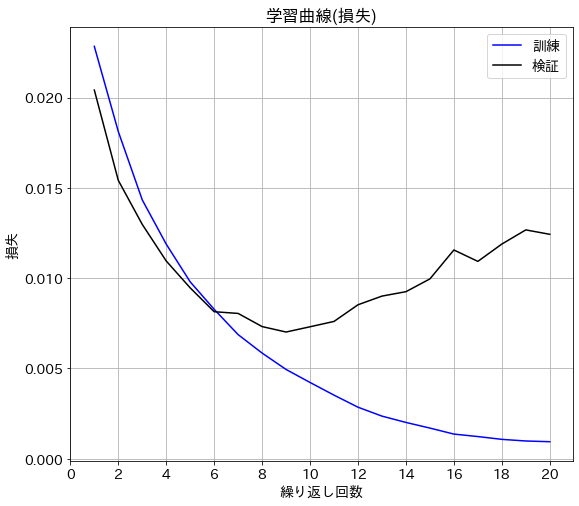

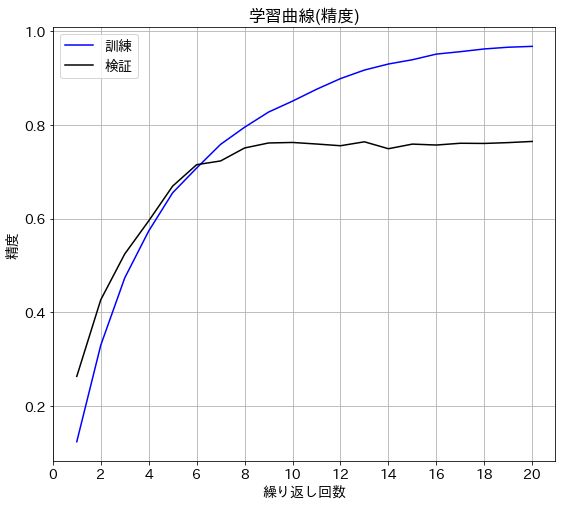

In [29]:
evaluate_history(history2)

In [30]:
torch_seed()

lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history3 = np.zeros((0, 5))

In [31]:
num_epochs = 20
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)


Epoch [1/20], loss: 0.01600 acc: 0.40706 val_loss: 0.01289, val_acc: 0.53420



Epoch [2/20], loss: 0.01110 acc: 0.60014 val_loss: 0.01014, val_acc: 0.63870



Epoch [3/20], loss: 0.00872 acc: 0.68932 val_loss: 0.00905, val_acc: 0.68810



Epoch [4/20], loss: 0.00729 acc: 0.74412 val_loss: 0.00763, val_acc: 0.73330



Epoch [5/20], loss: 0.00618 acc: 0.78178 val_loss: 0.00727, val_acc: 0.74450



Epoch [6/20], loss: 0.00526 acc: 0.81568 val_loss: 0.00708, val_acc: 0.75910



Epoch [7/20], loss: 0.00446 acc: 0.84324 val_loss: 0.00724, val_acc: 0.76800



Epoch [8/20], loss: 0.00375 acc: 0.86800 val_loss: 0.00760, val_acc: 0.76530



Epoch [9/20], loss: 0.00311 acc: 0.88894 val_loss: 0.00756, val_acc: 0.76300



Epoch [10/20], loss: 0.00255 acc: 0.90924 val_loss: 0.00858, val_acc: 0.76160



Epoch [11/20], loss: 0.00210 acc: 0.92476 val_loss: 0.00956, val_acc: 0.76050



Epoch [12/20], loss: 0.00173 acc: 0.93808 val_loss: 0.01029, val_acc: 0.76280



Epoch [13/20], loss: 0.00153 acc: 0.94582 val_loss: 0.01081, val_acc: 0.76360



Epoch [14/20], loss: 0.00132 acc: 0.95284 val_loss: 0.01212, val_acc: 0.75340



Epoch [15/20], loss: 0.00118 acc: 0.95762 val_loss: 0.01321, val_acc: 0.75160



Epoch [16/20], loss: 0.00106 acc: 0.96250 val_loss: 0.01298, val_acc: 0.75480



Epoch [17/20], loss: 0.00107 acc: 0.96188 val_loss: 0.01284, val_acc: 0.76140



Epoch [18/20], loss: 0.00098 acc: 0.96534 val_loss: 0.01233, val_acc: 0.75700



Epoch [19/20], loss: 0.00086 acc: 0.96982 val_loss: 0.01344, val_acc: 0.76030



Epoch [20/20], loss: 0.00080 acc: 0.97206 val_loss: 0.01455, val_acc: 0.75800


初期状態: 損失: 0.01289 精度: 0.53420
最終状態: 損失: 0.01455 精度: 0.75800


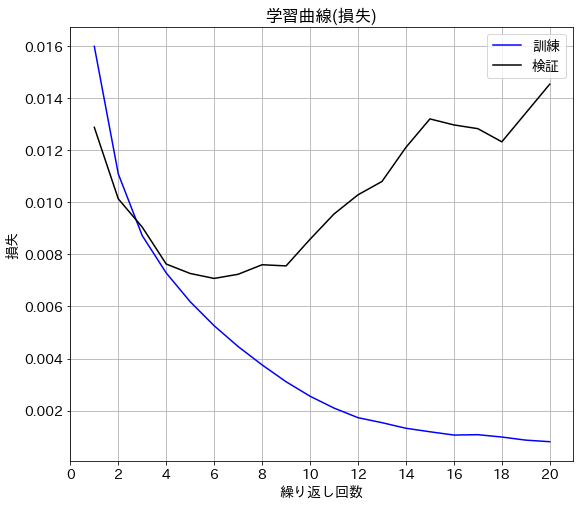

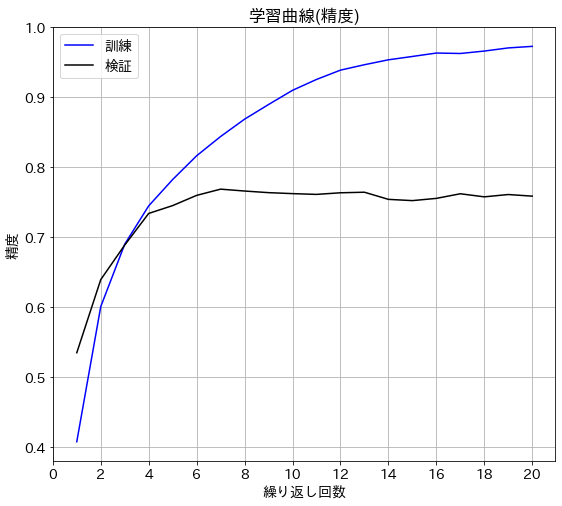

In [32]:
evaluate_history(history3)

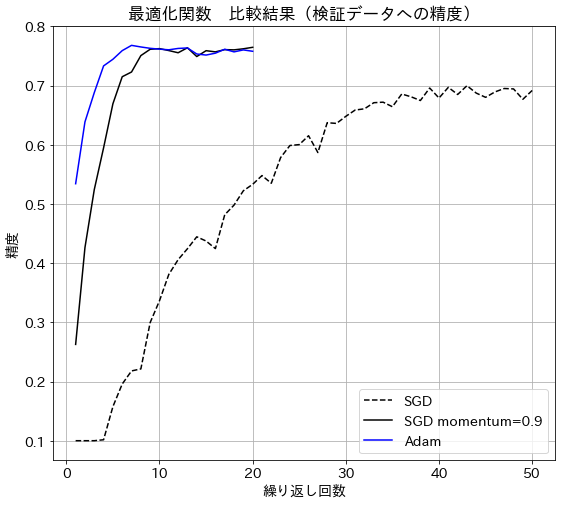

In [35]:
# 結果の比較(検証データへの精度)
plt.figure(figsize=(9,8))
plt.plot(history[:,0], history[:,4], label='SGD', c='k',ls='dashed' )
plt.plot(history2[:,0], history2[:,4], label='SGD momentum=0.9', c='k')
plt.plot(history3[:,0], history3[:,4], label='Adam', c='b')
plt.title('最適化関数　比較結果（検証データへの精度）')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.legend()
plt.show()

In [36]:
# 予測クラスの定義

class CNN_v3(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, 10)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

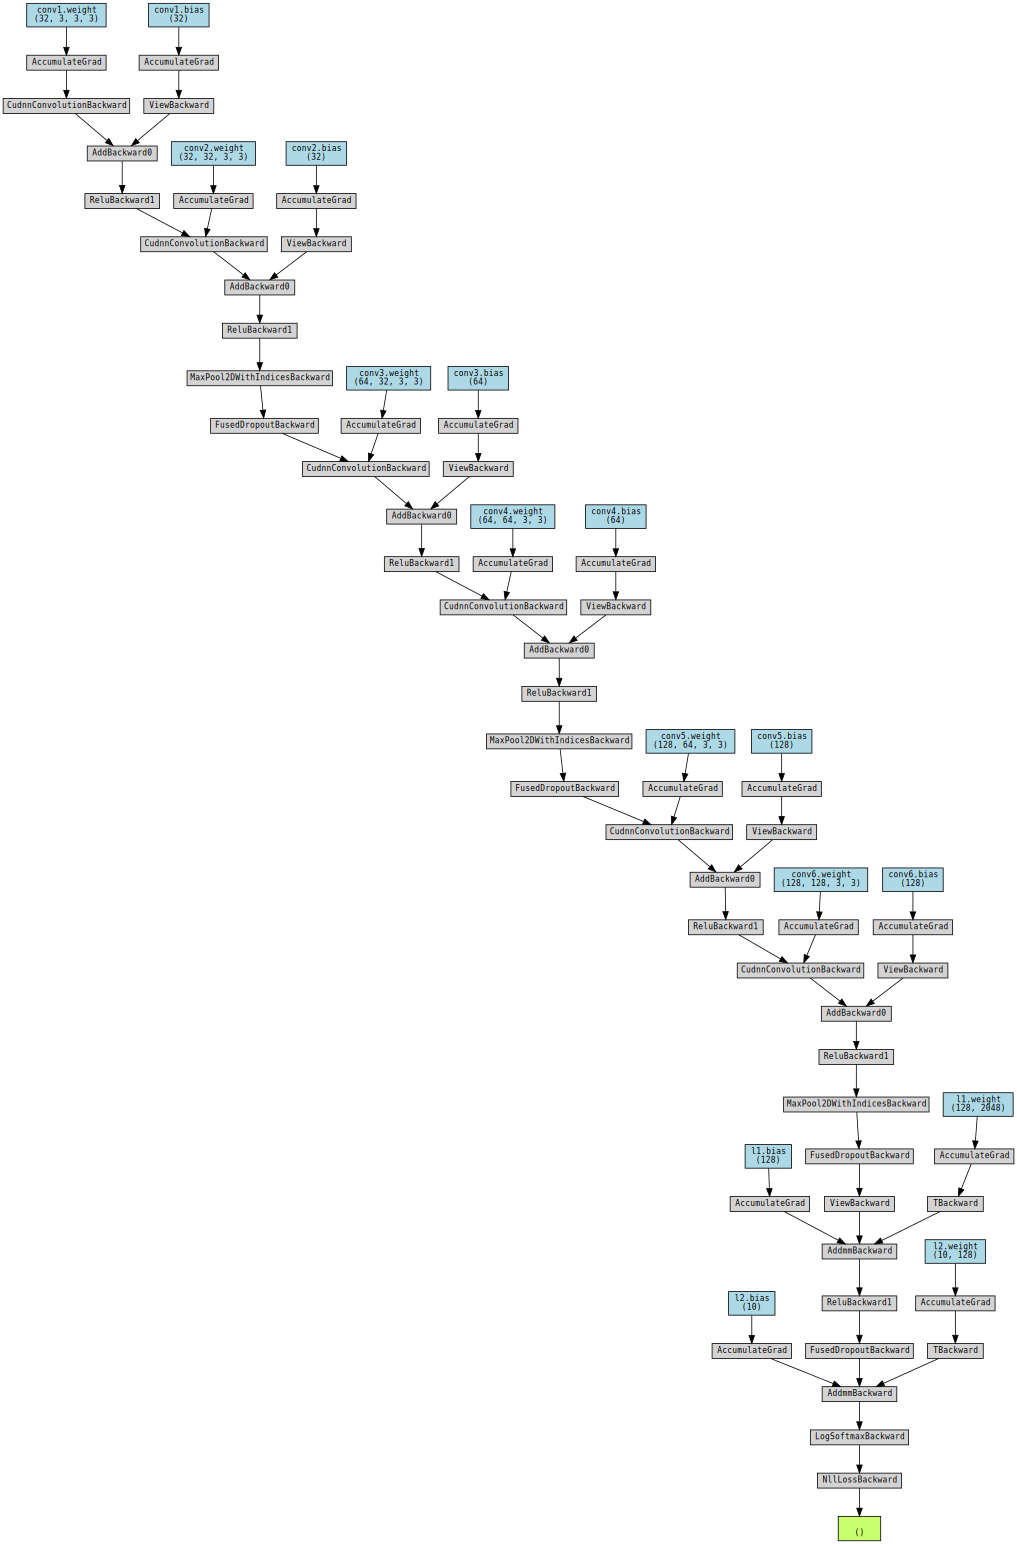

In [37]:
net = CNN_v3(n_output).to(device)
criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [39]:
torch_seed()

net = CNN_v3(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [40]:
num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)


Epoch [1/50], loss: 0.01703 acc: 0.36352 val_loss: 0.01304, val_acc: 0.51860



Epoch [2/50], loss: 0.01295 acc: 0.52964 val_loss: 0.01084, val_acc: 0.61360



Epoch [3/50], loss: 0.01127 acc: 0.59666 val_loss: 0.00978, val_acc: 0.65540



Epoch [4/50], loss: 0.01019 acc: 0.63786 val_loss: 0.00880, val_acc: 0.68110



Epoch [5/50], loss: 0.00926 acc: 0.67632 val_loss: 0.00846, val_acc: 0.70280



Epoch [6/50], loss: 0.00871 acc: 0.69404 val_loss: 0.00769, val_acc: 0.73280



Epoch [7/50], loss: 0.00809 acc: 0.72002 val_loss: 0.00746, val_acc: 0.73810



Epoch [8/50], loss: 0.00769 acc: 0.73298 val_loss: 0.00707, val_acc: 0.75490



Epoch [9/50], loss: 0.00733 acc: 0.74608 val_loss: 0.00676, val_acc: 0.76570



Epoch [10/50], loss: 0.00698 acc: 0.76098 val_loss: 0.00646, val_acc: 0.77770



Epoch [11/50], loss: 0.00677 acc: 0.76814 val_loss: 0.00653, val_acc: 0.77450



Epoch [12/50], loss: 0.00648 acc: 0.77482 val_loss: 0.00605, val_acc: 0.79240



Epoch [13/50], loss: 0.00628 acc: 0.78244 val_loss: 0.00616, val_acc: 0.79350



Epoch [14/50], loss: 0.00616 acc: 0.78642 val_loss: 0.00613, val_acc: 0.79050



Epoch [15/50], loss: 0.00598 acc: 0.79436 val_loss: 0.00589, val_acc: 0.79820



Epoch [16/50], loss: 0.00589 acc: 0.79594 val_loss: 0.00581, val_acc: 0.80310



Epoch [17/50], loss: 0.00572 acc: 0.80252 val_loss: 0.00565, val_acc: 0.80840



Epoch [18/50], loss: 0.00559 acc: 0.80728 val_loss: 0.00574, val_acc: 0.80360



Epoch [19/50], loss: 0.00554 acc: 0.80800 val_loss: 0.00573, val_acc: 0.80380



Epoch [20/50], loss: 0.00544 acc: 0.81246 val_loss: 0.00572, val_acc: 0.80930



Epoch [21/50], loss: 0.00532 acc: 0.81504 val_loss: 0.00562, val_acc: 0.81220



Epoch [22/50], loss: 0.00526 acc: 0.81672 val_loss: 0.00566, val_acc: 0.81070



Epoch [23/50], loss: 0.00518 acc: 0.82030 val_loss: 0.00574, val_acc: 0.80720



Epoch [24/50], loss: 0.00510 acc: 0.82306 val_loss: 0.00560, val_acc: 0.81440



Epoch [25/50], loss: 0.00505 acc: 0.82434 val_loss: 0.00554, val_acc: 0.81250



Epoch [26/50], loss: 0.00491 acc: 0.83004 val_loss: 0.00529, val_acc: 0.82300



Epoch [27/50], loss: 0.00485 acc: 0.83222 val_loss: 0.00536, val_acc: 0.81840



Epoch [28/50], loss: 0.00483 acc: 0.83204 val_loss: 0.00547, val_acc: 0.82180



Epoch [29/50], loss: 0.00481 acc: 0.83446 val_loss: 0.00557, val_acc: 0.81670



Epoch [30/50], loss: 0.00473 acc: 0.83670 val_loss: 0.00533, val_acc: 0.82240



Epoch [31/50], loss: 0.00470 acc: 0.83860 val_loss: 0.00539, val_acc: 0.82050



Epoch [32/50], loss: 0.00460 acc: 0.84086 val_loss: 0.00556, val_acc: 0.82040



Epoch [33/50], loss: 0.00461 acc: 0.84078 val_loss: 0.00554, val_acc: 0.82090



Epoch [34/50], loss: 0.00455 acc: 0.84194 val_loss: 0.00529, val_acc: 0.82530



Epoch [35/50], loss: 0.00453 acc: 0.84312 val_loss: 0.00562, val_acc: 0.82040



Epoch [36/50], loss: 0.00443 acc: 0.84470 val_loss: 0.00531, val_acc: 0.82740



Epoch [37/50], loss: 0.00435 acc: 0.84982 val_loss: 0.00536, val_acc: 0.82770



Epoch [38/50], loss: 0.00438 acc: 0.84706 val_loss: 0.00541, val_acc: 0.82430



Epoch [39/50], loss: 0.00435 acc: 0.84840 val_loss: 0.00542, val_acc: 0.82600



Epoch [40/50], loss: 0.00437 acc: 0.85012 val_loss: 0.00537, val_acc: 0.82830



Epoch [41/50], loss: 0.00429 acc: 0.85186 val_loss: 0.00529, val_acc: 0.82650



Epoch [42/50], loss: 0.00425 acc: 0.85302 val_loss: 0.00538, val_acc: 0.83060



Epoch [43/50], loss: 0.00425 acc: 0.85122 val_loss: 0.00548, val_acc: 0.83300



Epoch [44/50], loss: 0.00417 acc: 0.85480 val_loss: 0.00532, val_acc: 0.83310



Epoch [45/50], loss: 0.00409 acc: 0.85904 val_loss: 0.00536, val_acc: 0.82800



Epoch [46/50], loss: 0.00406 acc: 0.85796 val_loss: 0.00555, val_acc: 0.82930



Epoch [47/50], loss: 0.00413 acc: 0.85794 val_loss: 0.00548, val_acc: 0.82730



Epoch [48/50], loss: 0.00403 acc: 0.85962 val_loss: 0.00575, val_acc: 0.82440



Epoch [49/50], loss: 0.00404 acc: 0.86178 val_loss: 0.00561, val_acc: 0.82250



Epoch [50/50], loss: 0.00406 acc: 0.85886 val_loss: 0.00522, val_acc: 0.83250


初期状態: 損失: 0.01304 精度: 0.51860
最終状態: 損失: 0.00522 精度: 0.83250


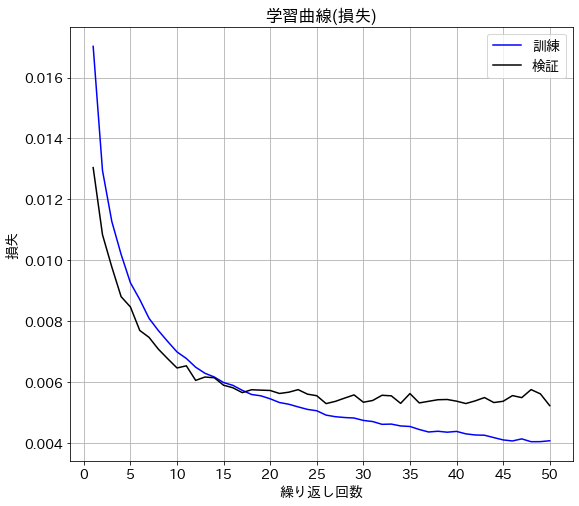

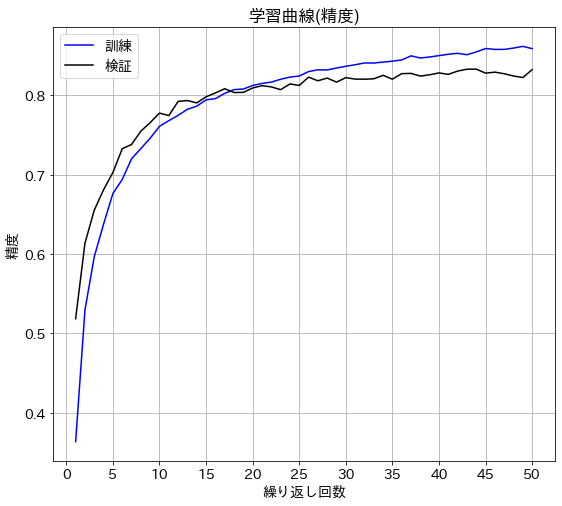

In [41]:
evaluate_history(history)

In [42]:
class CNN_v4(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, 10)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn6 = nn.BatchNorm2d(128)

        self.features = nn.Sequential(
            self.conv1,
            self.bn1,
            self.relu,
            self.conv2,
            self.bn2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn3,
            self.relu,
            self.conv4,
            self.bn4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn5,
            self.relu,
            self.conv6,
            self.bn6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [43]:
torch_seed()

net = CNN_v4(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [44]:
num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)


Epoch [1/50], loss: 0.01504 acc: 0.44606 val_loss: 0.01103, val_acc: 0.59900



Epoch [2/50], loss: 0.01124 acc: 0.60162 val_loss: 0.01018, val_acc: 0.63260



Epoch [3/50], loss: 0.00982 acc: 0.65536 val_loss: 0.00792, val_acc: 0.72380



Epoch [4/50], loss: 0.00891 acc: 0.68942 val_loss: 0.00789, val_acc: 0.72750



Epoch [5/50], loss: 0.00836 acc: 0.71448 val_loss: 0.00692, val_acc: 0.76270



Epoch [6/50], loss: 0.00778 acc: 0.73422 val_loss: 0.00642, val_acc: 0.77860



Epoch [7/50], loss: 0.00740 acc: 0.74976 val_loss: 0.00604, val_acc: 0.79180



Epoch [8/50], loss: 0.00705 acc: 0.76126 val_loss: 0.00598, val_acc: 0.79170



Epoch [9/50], loss: 0.00673 acc: 0.77144 val_loss: 0.00602, val_acc: 0.79420



Epoch [10/50], loss: 0.00643 acc: 0.78320 val_loss: 0.00556, val_acc: 0.80630



Epoch [11/50], loss: 0.00616 acc: 0.79112 val_loss: 0.00546, val_acc: 0.81960



Epoch [12/50], loss: 0.00593 acc: 0.80320 val_loss: 0.00518, val_acc: 0.82520



Epoch [13/50], loss: 0.00572 acc: 0.80822 val_loss: 0.00527, val_acc: 0.82320



Epoch [14/50], loss: 0.00554 acc: 0.81326 val_loss: 0.00498, val_acc: 0.83280



Epoch [15/50], loss: 0.00536 acc: 0.82132 val_loss: 0.00499, val_acc: 0.83400



Epoch [16/50], loss: 0.00516 acc: 0.82754 val_loss: 0.00508, val_acc: 0.83210



Epoch [17/50], loss: 0.00500 acc: 0.83442 val_loss: 0.00484, val_acc: 0.84290



Epoch [18/50], loss: 0.00492 acc: 0.83802 val_loss: 0.00499, val_acc: 0.83820



Epoch [19/50], loss: 0.00468 acc: 0.84370 val_loss: 0.00487, val_acc: 0.84380



Epoch [20/50], loss: 0.00459 acc: 0.84542 val_loss: 0.00489, val_acc: 0.84140



Epoch [21/50], loss: 0.00451 acc: 0.85064 val_loss: 0.00470, val_acc: 0.84710



Epoch [22/50], loss: 0.00436 acc: 0.85522 val_loss: 0.00478, val_acc: 0.84440



Epoch [23/50], loss: 0.00425 acc: 0.85800 val_loss: 0.00489, val_acc: 0.84720



Epoch [24/50], loss: 0.00408 acc: 0.86172 val_loss: 0.00475, val_acc: 0.84760



Epoch [25/50], loss: 0.00404 acc: 0.86448 val_loss: 0.00455, val_acc: 0.85330



Epoch [26/50], loss: 0.00387 acc: 0.87142 val_loss: 0.00463, val_acc: 0.85310



Epoch [27/50], loss: 0.00380 acc: 0.87314 val_loss: 0.00449, val_acc: 0.85580



Epoch [28/50], loss: 0.00378 acc: 0.87424 val_loss: 0.00431, val_acc: 0.86070



Epoch [29/50], loss: 0.00362 acc: 0.88012 val_loss: 0.00449, val_acc: 0.86080



Epoch [30/50], loss: 0.00357 acc: 0.87934 val_loss: 0.00441, val_acc: 0.86120



Epoch [31/50], loss: 0.00346 acc: 0.88310 val_loss: 0.00442, val_acc: 0.86510



Epoch [32/50], loss: 0.00342 acc: 0.88550 val_loss: 0.00445, val_acc: 0.86200



Epoch [33/50], loss: 0.00332 acc: 0.88750 val_loss: 0.00451, val_acc: 0.85980



Epoch [34/50], loss: 0.00327 acc: 0.89108 val_loss: 0.00454, val_acc: 0.85880



Epoch [35/50], loss: 0.00320 acc: 0.89176 val_loss: 0.00465, val_acc: 0.85760



Epoch [36/50], loss: 0.00314 acc: 0.89358 val_loss: 0.00456, val_acc: 0.86210



Epoch [37/50], loss: 0.00306 acc: 0.89818 val_loss: 0.00467, val_acc: 0.86350



Epoch [38/50], loss: 0.00302 acc: 0.89858 val_loss: 0.00424, val_acc: 0.86610



Epoch [39/50], loss: 0.00299 acc: 0.89802 val_loss: 0.00454, val_acc: 0.86270



Epoch [40/50], loss: 0.00292 acc: 0.90194 val_loss: 0.00443, val_acc: 0.86440



Epoch [41/50], loss: 0.00292 acc: 0.90164 val_loss: 0.00449, val_acc: 0.86900



Epoch [42/50], loss: 0.00284 acc: 0.90436 val_loss: 0.00470, val_acc: 0.85730



Epoch [43/50], loss: 0.00285 acc: 0.90376 val_loss: 0.00436, val_acc: 0.86630



Epoch [44/50], loss: 0.00276 acc: 0.90686 val_loss: 0.00455, val_acc: 0.86830



Epoch [45/50], loss: 0.00273 acc: 0.90752 val_loss: 0.00465, val_acc: 0.86510



Epoch [46/50], loss: 0.00269 acc: 0.90918 val_loss: 0.00481, val_acc: 0.86640



Epoch [47/50], loss: 0.00267 acc: 0.91020 val_loss: 0.00450, val_acc: 0.86800



Epoch [48/50], loss: 0.00262 acc: 0.91064 val_loss: 0.00462, val_acc: 0.86830



Epoch [49/50], loss: 0.00261 acc: 0.91120 val_loss: 0.00443, val_acc: 0.87210



Epoch [50/50], loss: 0.00257 acc: 0.91260 val_loss: 0.00449, val_acc: 0.86790


初期状態: 損失: 0.01103 精度: 0.59900
最終状態: 損失: 0.00449 精度: 0.86790


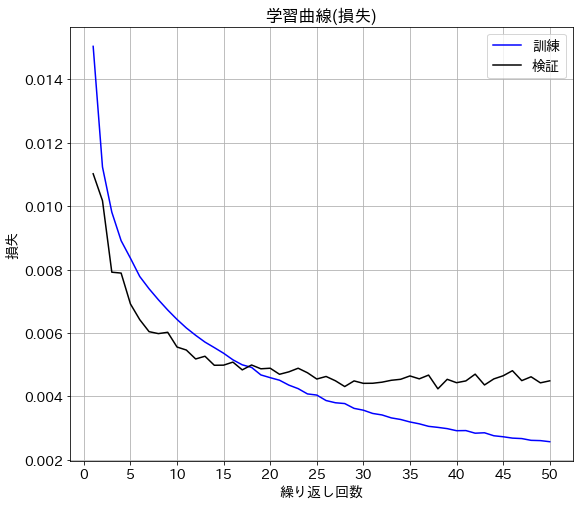

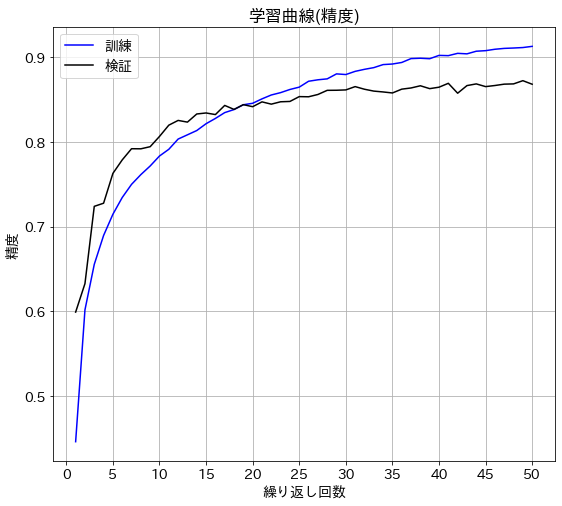

In [45]:
evaluate_history(history)

In [46]:
transform_train = transforms.Compose([
  transforms.RandomHorizontalFlip(p=0.5), 
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5), 
  transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [47]:
train_set2 = datasets.CIFAR10(
    root=data_root,
    train=True,
    download=True,
    transform=transform_train
)

Files already downloaded and verified


In [48]:
batch_size = 100
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

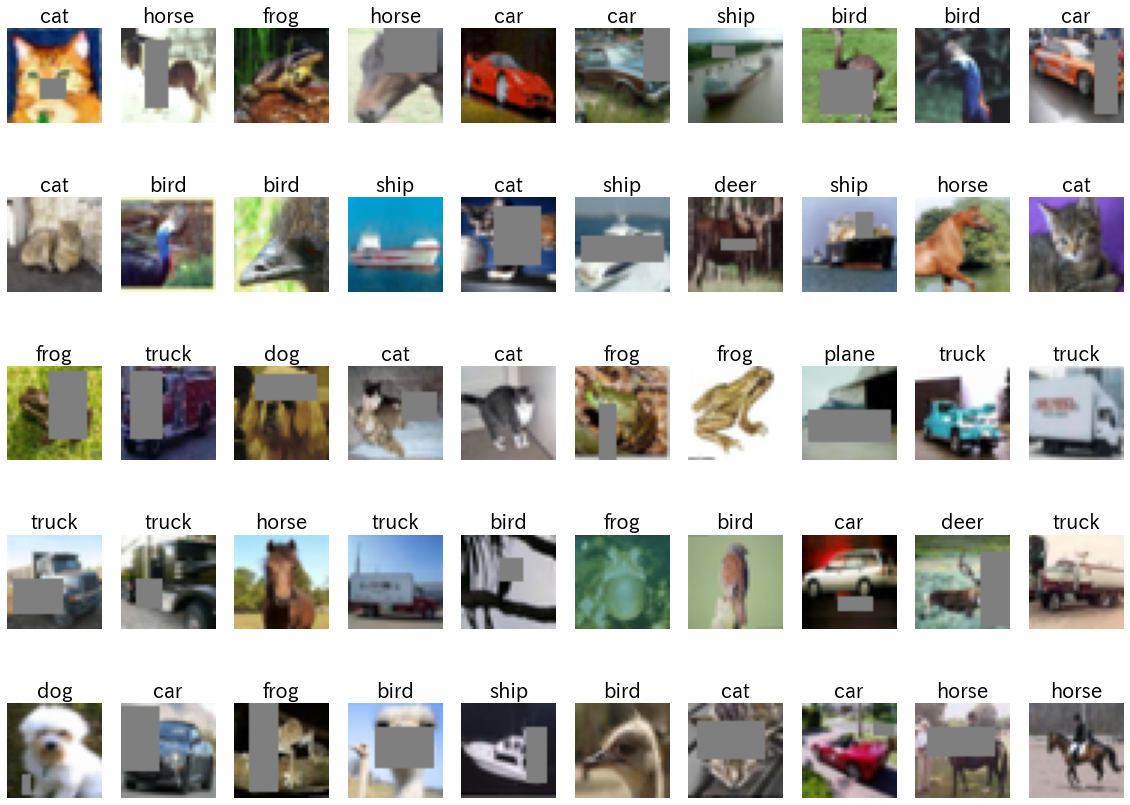

In [52]:
torch_seed()
show_images_labels(train_loader2, classes, None, None)

In [54]:
torch_seed()

net = CNN_v4(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [55]:
num_epochs = 100
history = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader, device, history)


Epoch [1/100], loss: 0.01588 acc: 0.41132 val_loss: 0.01198, val_acc: 0.56500



Epoch [2/100], loss: 0.01265 acc: 0.54648 val_loss: 0.01054, val_acc: 0.63090



Epoch [3/100], loss: 0.01127 acc: 0.59944 val_loss: 0.00898, val_acc: 0.67090



Epoch [4/100], loss: 0.01040 acc: 0.63316 val_loss: 0.00797, val_acc: 0.71150



Epoch [5/100], loss: 0.00983 acc: 0.65582 val_loss: 0.00780, val_acc: 0.72480



Epoch [6/100], loss: 0.00936 acc: 0.67592 val_loss: 0.00715, val_acc: 0.75460



Epoch [7/100], loss: 0.00905 acc: 0.68770 val_loss: 0.00705, val_acc: 0.75060



Epoch [8/100], loss: 0.00868 acc: 0.70122 val_loss: 0.00697, val_acc: 0.75750



Epoch [9/100], loss: 0.00841 acc: 0.71280 val_loss: 0.00633, val_acc: 0.78300



Epoch [10/100], loss: 0.00820 acc: 0.72070 val_loss: 0.00620, val_acc: 0.78670



Epoch [11/100], loss: 0.00788 acc: 0.73194 val_loss: 0.00597, val_acc: 0.79640



Epoch [12/100], loss: 0.00769 acc: 0.73866 val_loss: 0.00574, val_acc: 0.80170



Epoch [13/100], loss: 0.00756 acc: 0.74350 val_loss: 0.00555, val_acc: 0.80730



Epoch [14/100], loss: 0.00735 acc: 0.75178 val_loss: 0.00529, val_acc: 0.82040



Epoch [15/100], loss: 0.00718 acc: 0.75798 val_loss: 0.00564, val_acc: 0.80700



Epoch [16/100], loss: 0.00709 acc: 0.76086 val_loss: 0.00513, val_acc: 0.82290



Epoch [17/100], loss: 0.00685 acc: 0.77126 val_loss: 0.00508, val_acc: 0.82340



Epoch [18/100], loss: 0.00676 acc: 0.77344 val_loss: 0.00489, val_acc: 0.83040



Epoch [19/100], loss: 0.00667 acc: 0.77548 val_loss: 0.00550, val_acc: 0.81620



Epoch [20/100], loss: 0.00654 acc: 0.78104 val_loss: 0.00484, val_acc: 0.83470



Epoch [21/100], loss: 0.00643 acc: 0.78250 val_loss: 0.00468, val_acc: 0.83960



Epoch [22/100], loss: 0.00631 acc: 0.78844 val_loss: 0.00459, val_acc: 0.84530



Epoch [23/100], loss: 0.00630 acc: 0.78674 val_loss: 0.00459, val_acc: 0.84670



Epoch [24/100], loss: 0.00619 acc: 0.79270 val_loss: 0.00468, val_acc: 0.84260



Epoch [25/100], loss: 0.00612 acc: 0.79494 val_loss: 0.00448, val_acc: 0.85200



Epoch [26/100], loss: 0.00600 acc: 0.79882 val_loss: 0.00446, val_acc: 0.85080



Epoch [27/100], loss: 0.00590 acc: 0.80366 val_loss: 0.00443, val_acc: 0.85090



Epoch [28/100], loss: 0.00581 acc: 0.80470 val_loss: 0.00422, val_acc: 0.85930



Epoch [29/100], loss: 0.00573 acc: 0.80914 val_loss: 0.00429, val_acc: 0.85370



Epoch [30/100], loss: 0.00562 acc: 0.81302 val_loss: 0.00421, val_acc: 0.85740



Epoch [31/100], loss: 0.00559 acc: 0.81220 val_loss: 0.00456, val_acc: 0.85100



Epoch [32/100], loss: 0.00549 acc: 0.81576 val_loss: 0.00431, val_acc: 0.85850



Epoch [33/100], loss: 0.00539 acc: 0.81636 val_loss: 0.00409, val_acc: 0.86380



Epoch [34/100], loss: 0.00540 acc: 0.81752 val_loss: 0.00408, val_acc: 0.86330



Epoch [35/100], loss: 0.00537 acc: 0.81974 val_loss: 0.00424, val_acc: 0.85550



Epoch [36/100], loss: 0.00528 acc: 0.82330 val_loss: 0.00416, val_acc: 0.86030



Epoch [37/100], loss: 0.00528 acc: 0.82318 val_loss: 0.00429, val_acc: 0.86170



Epoch [38/100], loss: 0.00518 acc: 0.82458 val_loss: 0.00397, val_acc: 0.86860



Epoch [39/100], loss: 0.00513 acc: 0.82726 val_loss: 0.00401, val_acc: 0.86650



Epoch [40/100], loss: 0.00508 acc: 0.82986 val_loss: 0.00449, val_acc: 0.85320



Epoch [41/100], loss: 0.00504 acc: 0.82766 val_loss: 0.00392, val_acc: 0.87140



Epoch [42/100], loss: 0.00499 acc: 0.83004 val_loss: 0.00393, val_acc: 0.86940



Epoch [43/100], loss: 0.00504 acc: 0.83194 val_loss: 0.00380, val_acc: 0.87400



Epoch [44/100], loss: 0.00491 acc: 0.83252 val_loss: 0.00375, val_acc: 0.87530



Epoch [45/100], loss: 0.00496 acc: 0.83284 val_loss: 0.00396, val_acc: 0.86850



Epoch [46/100], loss: 0.00493 acc: 0.83298 val_loss: 0.00383, val_acc: 0.87800



Epoch [47/100], loss: 0.00480 acc: 0.83768 val_loss: 0.00383, val_acc: 0.87370



Epoch [48/100], loss: 0.00486 acc: 0.83604 val_loss: 0.00381, val_acc: 0.87420



Epoch [49/100], loss: 0.00478 acc: 0.83810 val_loss: 0.00397, val_acc: 0.87190



Epoch [50/100], loss: 0.00471 acc: 0.84094 val_loss: 0.00395, val_acc: 0.87380



Epoch [51/100], loss: 0.00471 acc: 0.83940 val_loss: 0.00381, val_acc: 0.87690



Epoch [52/100], loss: 0.00468 acc: 0.84078 val_loss: 0.00382, val_acc: 0.87410



Epoch [53/100], loss: 0.00459 acc: 0.84618 val_loss: 0.00375, val_acc: 0.87930



Epoch [54/100], loss: 0.00463 acc: 0.84244 val_loss: 0.00364, val_acc: 0.87900



Epoch [55/100], loss: 0.00455 acc: 0.84700 val_loss: 0.00382, val_acc: 0.87860



Epoch [56/100], loss: 0.00463 acc: 0.84218 val_loss: 0.00376, val_acc: 0.87530



Epoch [57/100], loss: 0.00456 acc: 0.84438 val_loss: 0.00362, val_acc: 0.88090



Epoch [58/100], loss: 0.00455 acc: 0.84436 val_loss: 0.00383, val_acc: 0.87280



Epoch [59/100], loss: 0.00452 acc: 0.84606 val_loss: 0.00375, val_acc: 0.87710



Epoch [60/100], loss: 0.00446 acc: 0.84784 val_loss: 0.00368, val_acc: 0.88000



Epoch [61/100], loss: 0.00446 acc: 0.84768 val_loss: 0.00376, val_acc: 0.88060



Epoch [62/100], loss: 0.00435 acc: 0.85122 val_loss: 0.00370, val_acc: 0.88340



Epoch [63/100], loss: 0.00441 acc: 0.85076 val_loss: 0.00366, val_acc: 0.88340



Epoch [64/100], loss: 0.00437 acc: 0.85178 val_loss: 0.00355, val_acc: 0.88240



Epoch [65/100], loss: 0.00434 acc: 0.85134 val_loss: 0.00381, val_acc: 0.87990



Epoch [66/100], loss: 0.00436 acc: 0.85208 val_loss: 0.00349, val_acc: 0.88580



Epoch [67/100], loss: 0.00432 acc: 0.85138 val_loss: 0.00350, val_acc: 0.88600



Epoch [68/100], loss: 0.00430 acc: 0.85404 val_loss: 0.00368, val_acc: 0.88080



Epoch [69/100], loss: 0.00428 acc: 0.85488 val_loss: 0.00358, val_acc: 0.88440



Epoch [70/100], loss: 0.00426 acc: 0.85386 val_loss: 0.00348, val_acc: 0.88840



Epoch [71/100], loss: 0.00431 acc: 0.85404 val_loss: 0.00365, val_acc: 0.88300



Epoch [72/100], loss: 0.00426 acc: 0.85450 val_loss: 0.00364, val_acc: 0.88360



Epoch [73/100], loss: 0.00415 acc: 0.85890 val_loss: 0.00342, val_acc: 0.89020



Epoch [74/100], loss: 0.00418 acc: 0.85684 val_loss: 0.00352, val_acc: 0.88560



Epoch [75/100], loss: 0.00415 acc: 0.85684 val_loss: 0.00357, val_acc: 0.88140



Epoch [76/100], loss: 0.00416 acc: 0.85562 val_loss: 0.00353, val_acc: 0.88460



Epoch [77/100], loss: 0.00417 acc: 0.85760 val_loss: 0.00360, val_acc: 0.88470



Epoch [78/100], loss: 0.00411 acc: 0.86046 val_loss: 0.00341, val_acc: 0.88680



Epoch [79/100], loss: 0.00413 acc: 0.85976 val_loss: 0.00358, val_acc: 0.88500



Epoch [80/100], loss: 0.00408 acc: 0.86130 val_loss: 0.00352, val_acc: 0.88720



Epoch [81/100], loss: 0.00408 acc: 0.86020 val_loss: 0.00342, val_acc: 0.88520



Epoch [82/100], loss: 0.00404 acc: 0.86222 val_loss: 0.00365, val_acc: 0.88120



Epoch [83/100], loss: 0.00412 acc: 0.85938 val_loss: 0.00333, val_acc: 0.88730



Epoch [84/100], loss: 0.00397 acc: 0.86300 val_loss: 0.00357, val_acc: 0.88260



Epoch [85/100], loss: 0.00405 acc: 0.86088 val_loss: 0.00359, val_acc: 0.88330



Epoch [86/100], loss: 0.00401 acc: 0.86106 val_loss: 0.00356, val_acc: 0.88450



Epoch [87/100], loss: 0.00399 acc: 0.86198 val_loss: 0.00349, val_acc: 0.88620



Epoch [88/100], loss: 0.00396 acc: 0.86384 val_loss: 0.00330, val_acc: 0.89160



Epoch [89/100], loss: 0.00398 acc: 0.86332 val_loss: 0.00346, val_acc: 0.88640



Epoch [90/100], loss: 0.00394 acc: 0.86630 val_loss: 0.00347, val_acc: 0.88710



Epoch [91/100], loss: 0.00397 acc: 0.86454 val_loss: 0.00343, val_acc: 0.88740



Epoch [92/100], loss: 0.00395 acc: 0.86668 val_loss: 0.00335, val_acc: 0.89230



Epoch [93/100], loss: 0.00392 acc: 0.86624 val_loss: 0.00345, val_acc: 0.88960



Epoch [94/100], loss: 0.00386 acc: 0.86712 val_loss: 0.00353, val_acc: 0.89030



Epoch [95/100], loss: 0.00394 acc: 0.86462 val_loss: 0.00336, val_acc: 0.89040



Epoch [96/100], loss: 0.00391 acc: 0.86640 val_loss: 0.00325, val_acc: 0.89500



Epoch [97/100], loss: 0.00388 acc: 0.86428 val_loss: 0.00338, val_acc: 0.89210



Epoch [98/100], loss: 0.00386 acc: 0.86784 val_loss: 0.00339, val_acc: 0.89220



Epoch [99/100], loss: 0.00386 acc: 0.86788 val_loss: 0.00331, val_acc: 0.89360



Epoch [100/100], loss: 0.00381 acc: 0.86908 val_loss: 0.00337, val_acc: 0.89150


初期状態: 損失: 0.01198 精度: 0.56500
最終状態: 損失: 0.00337 精度: 0.89150


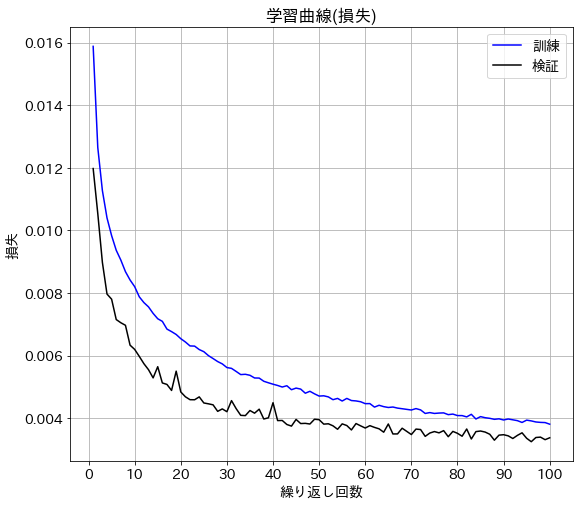

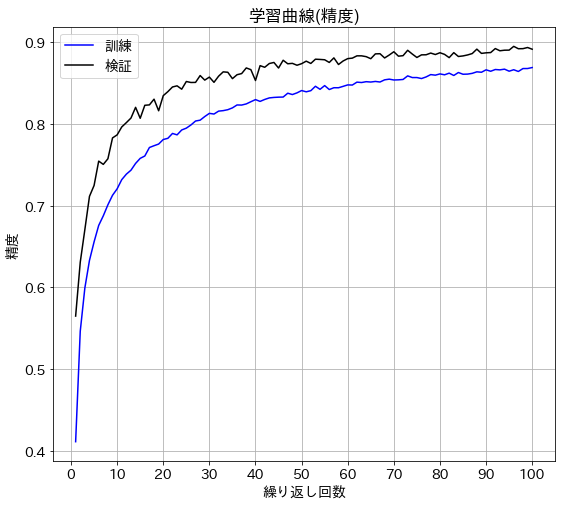

In [56]:
evaluate_history(history)

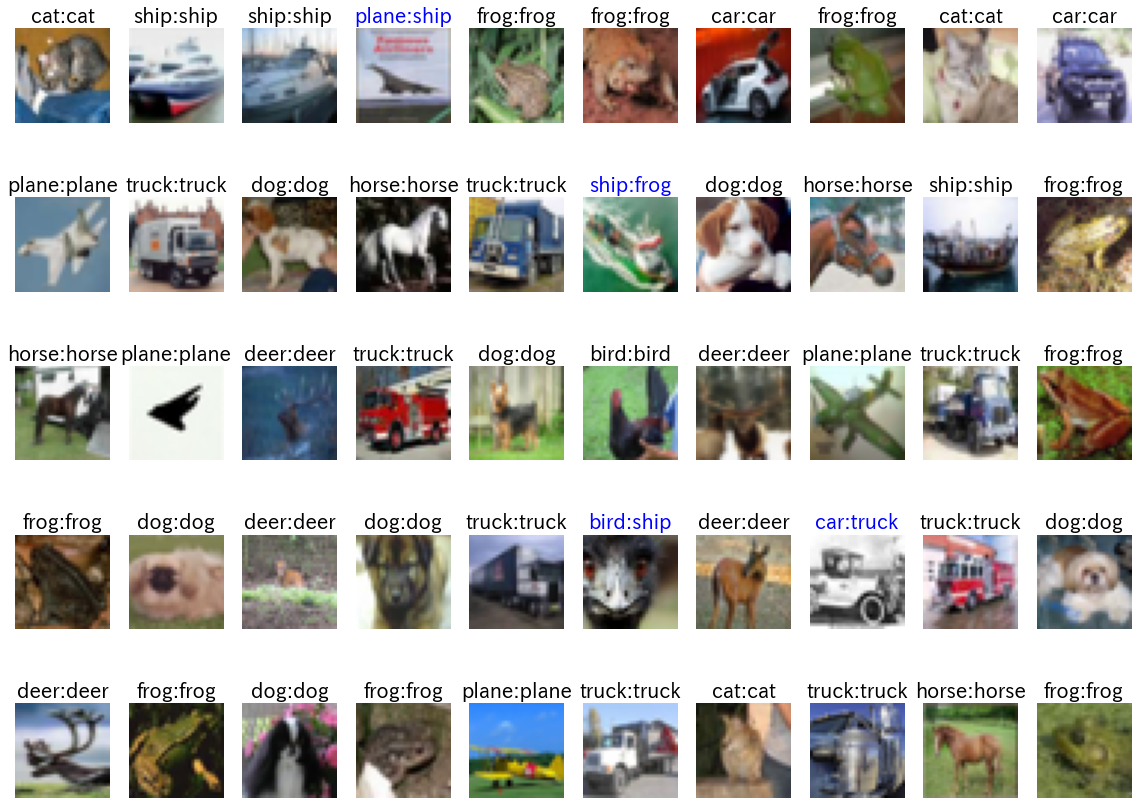

In [57]:
show_images_labels(test_loader, classes, net, device)

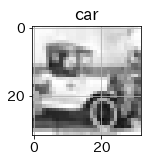

In [58]:
for images, labels, in test_loader:
    break

image = images[37]
label = labels[37]

plt.figure(figsize=(2, 2))
w = image.numpy().copy()
w2 = np.transpose(w, (1, 2, 0))
w3 = (w2 + 1) / 2

plt.title(classes[label])
plt.imshow(w3)
plt.show()

In [59]:
image = image.view(1, 3, 32, 32)
image = image.to(device)
output = net(image)

probs = torch.softmax(output, dim=1)
probs_np = probs.data.to('cpu').numpy()[0]
values = np.frompyfunc(lambda x: f'{x:.04f}', 1, 1)(probs_np)
names = np.array(classes)
tb1 = np.array([names, values]).T
print(tb1)

[['plane' '0.0000']
 ['car' '0.0142']
 ['bird' '0.0000']
 ['cat' '0.0000']
 ['deer' '0.0000']
 ['dog' '0.0000']
 ['frog' '0.0000']
 ['horse' '0.0000']
 ['ship' '0.0001']
 ['truck' '0.9857']]
